In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Explore Shapley Values

What happens when there are multiple copies of the same feature?

Observations:
- Even when a bunch of variables are highly correlated (e.g., z1, z2, z3, ... etc.), they are assigned unequal weights in SHAP
- Depending on random runs of the data, different variables get selected
- When y is dependent on both X and Z, essentially any ordering appears to be possible (although Z's tend to be on top)
- When y is dependent on ONLY X, we sometimes get the (expected) outcomes that the X's come out on top, but sometimes get the outcome that Z's come out on top 
(!!)

Robustness Tests:
- Comparison set matters: when the set of correlated features is smaller, the feautres are relatively more important
- Results are effectively random if the correlation is close to 1, but results are OK with moderate correlation (e.g., 0.6)

In [72]:
x = np.random.rand(1000)

In [73]:
z = np.random.rand(1000)

In [74]:
div = 5

In [75]:
random_vector = np.random.rand(1000) / div
random_vector2 = np.random.rand(1000) / div
random_vector3 = np.random.rand(1000) / div
random_vector4 = np.random.rand(1000) / div
random_vector5 = np.random.rand(1000) / div
random_vector6 = np.random.rand(1000) / div
random_vector7 = np.random.rand(1000) / div
random_vector8 = np.random.rand(1000) / div
random_vector9 = np.random.rand(1000) / div
random_vector10 = np.random.rand(1000) / div
random_vector11 = np.random.rand(1000) / div
random_vector12 = np.random.rand(1000) / div
random_vector13 = np.random.rand(1000) / div
random_vector14 = np.random.rand(1000) / div
random_vector15 = np.random.rand(1000) / div

In [76]:
# Create some copies of X
x1 = pd.DataFrame({"x1": x + random_vector})
x2 = pd.DataFrame({"x2": x + random_vector2})
x3 = pd.DataFrame({"x3": x + random_vector3})

In [77]:
# Create some copies of Z
z1 = pd.DataFrame({"z1": z + random_vector13})
z2 = pd.DataFrame({"z2": z + random_vector14})
z3 = pd.DataFrame({"z3": z + random_vector15})
z4 = pd.DataFrame({"z4": z + random_vector4})
z5 = pd.DataFrame({"z5": z + random_vector5})
z6 = pd.DataFrame({"z6": z + random_vector6})
z7 = pd.DataFrame({"z7": z + random_vector7})
z8 = pd.DataFrame({"z8": z + random_vector8})
z9 = pd.DataFrame({"z9": z + random_vector9})
z10 = pd.DataFrame({"z10": z + random_vector10})
z11 = pd.DataFrame({"z11": z + random_vector11})
z12 = pd.DataFrame({"z12": z + random_vector12})

In [78]:
# Create Y, which is a function of X and Z + some random number
y = pd.DataFrame({"y": x + z + np.random.rand(1000)*np.random.rand(1000)})

# Case where y is only a function of x
# y = pd.DataFrame({"y": x + np.random.rand(1000)*np.random.rand(1000)})

In [79]:
# Train a lasso model

X = pd.concat([x1, x2, x3, z1, z2, z3, z4, z5, z6, z7, z8, z9, z10, z11, z12], axis = 1)

In [80]:
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

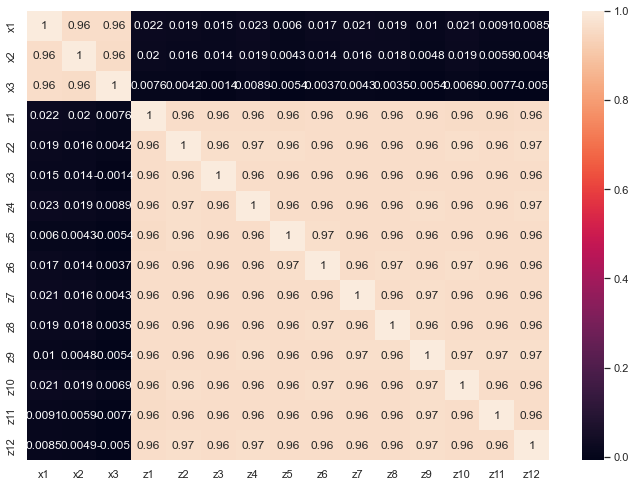

In [81]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(X.corr(), annot=True)

In [82]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [83]:
# Look at the relevant SHAP
explainer = shap.LinearExplainer(model, X)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


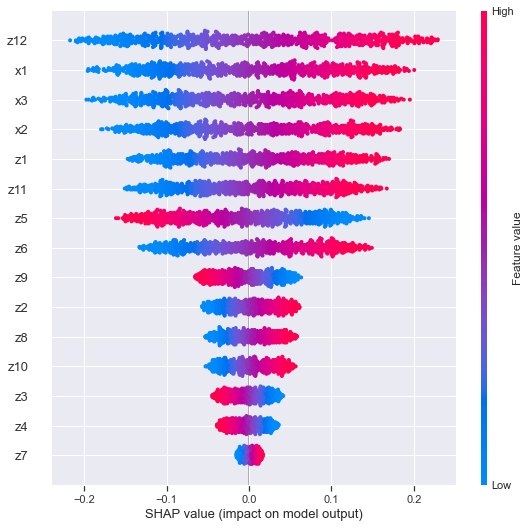

In [84]:
shap.summary_plot(explainer.shap_values(X), X)